In [48]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable, List, Dict, Any, Set, FrozenSet, Iterable, Tuple
import math
import random


In [2]:
distance=1

### On a torus, define the periodicity of the lattice

In [3]:
def torus(c: complex, *, distance: int) -> complex:
    r = c.real % (distance * 4)
    i = c.imag % (distance * 6)
    return r + i*1j

### To sort a list of complex

In [4]:
def sorted_complex(xs: Iterable[complex]) -> List[complex]:
    return sorted(xs, key=lambda v: (v.real, v.imag))

### Convert color to Pauli

In [41]:
def int_to_Pauli (i : int):
    if i==0:
        return "X"
    elif i==1:
        return "Y"
    elif i==2:
        return "Z"
    else: raise ValueError('integer must be 0,1,2')

### Plaquette coordinate 
hex_center = coordinate of the lattice, 2D --> using complex numbers, a plaquette is represented by a 2x2 squarre.

Category = 0,1,2 = red, green, blue

In [5]:
hex_centers: Dict[complex, int] = {}
for row in range(3 * distance):
    for col in range(2 * distance):
        center = row * 2j + 2 * col - 1j * (col % 2)
        category = (-row - col % 2) % 3
        hex_centers[torus(center, distance=distance)] = category

In [6]:
print(hex_centers)

{0j: 0, (2+5j): 2, 2j: 2, (2+1j): 1, 4j: 1, (2+3j): 0}


### Edges around a plaquette 

Defined by a list of 2 coordinates for the two qubits.

In [7]:
EDGES_AROUND_HEX: List[Tuple[complex, complex]] = [
    (-1 - 1j, +1 - 1j),
    (+1 - 1j, +1),
    (+1, +1 + 1j),
    (+1 + 1j, -1 + 1j),
    (-1 + 1j, -1),
    (-1, -1 - 1j),
]

### Edges from a plaquette 
Edges type is defined by which plaquettes they link: a edge between two red plaquettes is assigne "X"...

In [8]:
EDGES_FROM_HEX: List[Tuple[complex, complex]] = [
    (+1 + 1j, +1 + 2j),
    (+1 - 1j, +1 -2j),
    (+1, +3),
]
### only the edges on the right of the plaquette --> otherwise counted twice because all shared by two plaquettes
### for the edges on the left, take - those on the right.

In [9]:
edge_groups: Dict[str, List[FrozenSet[complex]]] = {"X": [], "Y": [], "Z": []}
edge_groups_no_frozen: Dict[str, List[complex]] = {"X": [], "Y": [], "Z": []}
red_hexes = [h for h, category in hex_centers.items() if category == 0]
for h in red_hexes:
    for edge in EDGES_FROM_HEX:
        q1=torus(h + edge[0], distance=distance)
        q2=torus(h + edge[1], distance=distance)
        edge_groups["X"].append(frozenset([q1,q2]))
        
        ### for graphic purpose, don't use the following for computation
        q1_no_torus=h + edge[0]
        q2_no_torus=h + edge[1]
        edge_groups_no_frozen["X"].append([q1_no_torus,q2_no_torus])

        
        
        
green_hexes = [h for h, category in hex_centers.items() if category == 1]
for h in green_hexes:
    for edge in EDGES_FROM_HEX:
        q1=torus(h + edge[0], distance=distance)
        q2=torus(h + edge[1], distance=distance)
        #print(h, q1,q2)
        edge_groups["Y"].append(frozenset([q1, q2]))
        
### for graphic purpose, don't use the following for computation
        q1_no_torus=h + edge[0]
        q2_no_torus=h + edge[1]
        edge_groups_no_frozen["Y"].append([q1_no_torus,q2_no_torus])        
 

blue_hexes = [h for h, category in hex_centers.items() if category == 2]
for h in blue_hexes:
    for edge in EDGES_FROM_HEX:
        q1=torus(h + edge[0], distance=distance)
        q2=torus(h + edge[1], distance=distance)
        #print(h, q1,q2)
        edge_groups["Z"].append(frozenset([q1, q2]))
        
### for graphic purpose, don't use the following for computation
        q1_no_torus=h + edge[0]
        q2_no_torus=h + edge[1]
        edge_groups_no_frozen["Z"].append([q1_no_torus,q2_no_torus])        
        

In [10]:
print(edge_groups["X"])

[frozenset({(1+1j), (1+2j)}), frozenset({(1+5j), (1+4j)}), frozenset({(1+0j), (3+0j)}), frozenset({(3+5j), (3+4j)}), frozenset({(3+2j), (3+1j)}), frozenset({(1+3j), (3+3j)})]


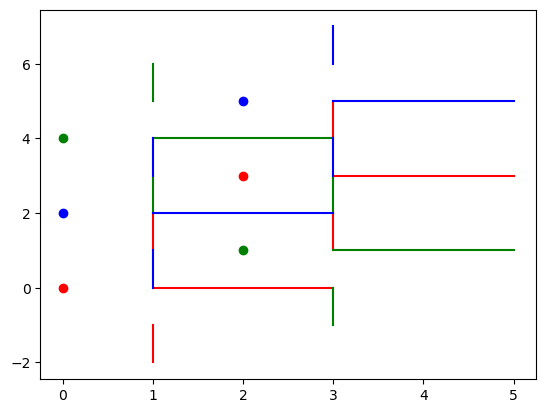

In [11]:
for e in edge_groups_no_frozen["X"]:
    plt.plot([e[0].real, e[1].real], [e[0].imag, e[1].imag], color='r')
    
for e in edge_groups_no_frozen["Y"]:
    plt.plot([e[0].real, e[1].real], [e[0].imag, e[1].imag], color='g')
    
for e in edge_groups_no_frozen["Z"]:
    plt.plot([e[0].real, e[1].real], [e[0].imag, e[1].imag], color='b')
    
for h in red_hexes:
    plt.scatter(h.real, h.imag, color='r')

for h in green_hexes:
    plt.scatter(h.real, h.imag, color='g')
    
for h in blue_hexes:
    plt.scatter(h.real, h.imag, color='b')

### Qubits

In [12]:
QUBITS_AROUND_HEX: List[Tuple[complex]] = [
    (-1 - 1j),
    (+1 - 1j),
    (+1),
    (+1 + 1j),
    (-1 + 1j),
    (-1),
]
### Qubits that form the plaquette

In [13]:
qubit_coordinates: Set[complex] = set()
for h in hex_centers:
    for qubit in QUBITS_AROUND_HEX:
            q = h + qubit
            qubit_coordinates.add(torus(q, distance=distance))
# All the qubits arec ounted at least three times            
            
# Assign integer indices to the qubit positions.
q2i: Dict[complex, int] = {q: i for i, q in enumerate(sorted_complex(qubit_coordinates))}

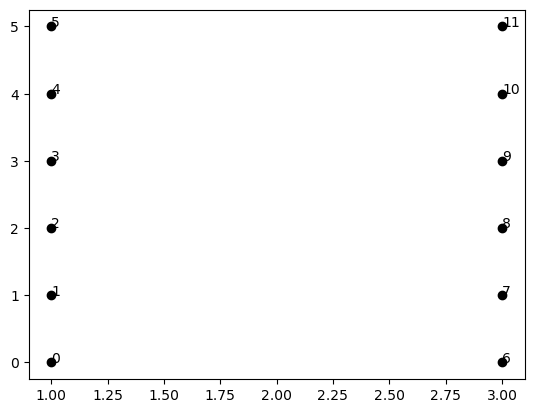

In [14]:
for qubit in q2i:
    plt.scatter([qubit.real], [qubit.imag], color='0')
    plt.annotate(q2i[qubit], (qubit.real, qubit.imag))

# Measurement Outcomes 

In [67]:
### Initialise all as 1


Mesurement_Outcomes_X:Dict[List[FrozenSet[complex]], bool] = {edge: 1 for edge in edge_groups["X"]}
Mesurement_Outcomes_Y:Dict[List[FrozenSet[complex]], bool] = {edge: 1 for edge in edge_groups["Y"]}
Mesurement_Outcomes_Z:Dict[List[FrozenSet[complex]], bool] = {edge: 1 for edge in edge_groups["Z"]}

In [68]:
Measurement_Outcomes: Dict[str, Dict[List[FrozenSet[complex]], bool]] = {"X": Mesurement_Outcomes_X, "Y": Mesurement_Outcomes_Y, "Z": Mesurement_Outcomes_Z }

# Syndrome

In [64]:
Syndrome: Dict[int, Dict[complex, bool]]={}
    
###Initialisation --> every plaquette =1 
Syndrome[0]={h: -1 for h, category in hex_centers.items() if category == 1}
Syndrome[1]={h: 1 for h, category in hex_centers.items() if category == 2}
Syndrome[2]={h: 1 for h, category in hex_centers.items() if category == 0}

### Simulate the t+1 measurement - Updating the edges value

In [65]:
def new_outcome(Syndrome:Dict[int, Dict[complex, bool]],\
                 Measurement_Outcomes: Dict[str, Dict[List[FrozenSet[complex]], bool]], error ):
    
    possible_outcomes=np.array([[1,1,1], [1,-1,-1], [-1,-1,1], [-1,1,-1]])
    t=np.max([t for t, s in Syndrome.items()])
    
    Measured_Pauli= int_to_Pauli((t+1)%3) #the edges type we will measure 
    
    for hex_c , syn_i in Syndrome[t-2].items() :
        
        assert hex_centers[hex_c]==(t+2)%3 #assert we are looking at the right plaquettes
                                            #at round 3 we have the syndrome for green (1) plaquettes
        
        check_op=syn_i
        edges_to_change=[]
        
        for edge0 in EDGES_AROUND_HEX:
            
            q1=torus(hex_c + edge0[0], distance=distance)
            q2=torus(hex_c + edge0[1], distance=distance)
            edge=frozenset([q1, q2])
            Paulis= [Pauli for Pauli in Measurement_Outcomes if edge in list(Measurement_Outcomes[Pauli].keys())] 
        #above command is a bit complicated maybe there is an easier way to implement it
            assert len(Paulis)==1 #assert there is only one plaquette at this location in the dictionnary 
            Pauli_edge=Paulis[0]
            
            if Pauli_edge==Measured_Pauli: edges_to_change.append(edge)
            elif Pauli_edge == int_to_Pauli(t%3): check_op *= Measurement_Outcomes[Pauli_edge][edge]
            else: raise ValueError('Wrong Pauli value for edges')
                
                
        assert len(edges_to_change)==3        
        new_edges_value=check_op*random.choice(possible_outcomes) # *errors , to implement later
        for i in range(3):
            Measurement_Outcomes[Measured_Pauli][edges_to_change[i]]=new_edges_value[i] #update the edges value
            

In [69]:
new_outcome(Syndrome, Measurement_Outcomes, 0)
print(Measurement_Outcomes)

{'X': {frozenset({(1+1j), (1+2j)}): -1, frozenset({(1+5j), (1+4j)}): -1, frozenset({(1+0j), (3+0j)}): 1, frozenset({(3+5j), (3+4j)}): -1, frozenset({(3+2j), (3+1j)}): 1, frozenset({(1+3j), (3+3j)}): -1}, 'Y': {frozenset({(3+2j), (3+3j)}): 1, frozenset({(3+5j), (3+0j)}): 1, frozenset({(1+1j), (3+1j)}): 1, frozenset({(1+5j), (1+0j)}): 1, frozenset({(1+3j), (1+2j)}): 1, frozenset({(1+4j), (3+4j)}): 1}, 'Z': {frozenset({(3+0j), (3+1j)}): 1, frozenset({(3+3j), (3+4j)}): 1, frozenset({(1+5j), (3+5j)}): 1, frozenset({(1+3j), (1+4j)}): 1, frozenset({(1+0j), (1+1j)}): 1, frozenset({(3+2j), (1+2j)}): 1}}


### Update the syndrome after the t+1 measurement

In [45]:
### No error for the moment 
def new_syndrome(Syndrome:Dict[int, Dict[complex, bool]],\
                 Measurement_Outcomes: Dict[str, Dict[List[FrozenSet[complex]], bool]]):
    t=np.max([t for t, s in Syndrome.items()])
    #print(t)
    Syndrome[t+1]={} ##Create the new key for time t+1
    for hex_c , syn_i in Syndrome[t-2].items() :
        
        assert hex_centers[hex_c]==(t+2)%3 #assert we are looking at the right plaquettes
                                            #at round 3 we have the syndrome for green (1) plaquettes
        syn_f=1
        for edge0 in EDGES_AROUND_HEX:
            q1=torus(hex_c + edge0[0], distance=distance)
            q2=torus(hex_c + edge0[1], distance=distance)
            edge=frozenset([q1, q2])
            Paulis= [Pauli for Pauli in Measurement_Outcomes if edge in list(Measurement_Outcomes[Pauli].keys())] 
        #above command is a bit complicated maybe there is an easier way to implement it
            assert len(Paulis)==1 #assert there is only one plaquette at this location in the dictionnary 
            Pauli_edge=Paulis[0]
            #print(Pauli_edge, syn_f)
            syn_f*= Measurement_Outcomes[Pauli_edge][edge] #multiply the syndrome by the edge value
        #syn_f*=syn_i  #compare it with the previous syndrome at time t-2 !!! we need to keep the real plaquette value to simulate the measurement outcomes
        Syndrome[t+1][hex_c]=syn_f #create the new key for the plaquette and save the syndrome value

In [46]:
new_syndrome(Syndrome, Measurement_Outcomes)
print(Syndrome)

{0: {(2+1j): 1, 4j: 1}, 1: {(2+5j): 1, 2j: 1}, 2: {0j: 1, (2+3j): 1}, 3: {(2+1j): -1, 4j: -1}}


# Draft stuff

In [112]:
frozenset({(1+1j), (1+2j)})==set({(1+1j), (1+2j)})

True

In [109]:
print(Measurement_Outcomes['X'][frozenset({(1+1j), (1+2j)})])

-1


In [111]:
Syndrome[0].items()

dict_items([(0j, 1), ((2+3j), 1)])

In [113]:
np.max([t for t, syn in Syndrome.items()])

2

In [119]:
for hex_c , syn_i in Syndrome[2].items() :
    syn_f=1
    for edge0 in EDGES_AROUND_HEX:
        q1=torus(hex_c + edge0[0], distance=distance)
        q2=torus(hex_c + edge0[1], distance=distance)
        edge=frozenset([q1, q2])
        Paulis= [Pauli for Pauli in Measurement_Outcomes if edge in list(Measurement_Outcomes[Pauli].keys())]
        assert len(Paulis)==1
        Pauli_edge=Paulis[0]
        print(Pauli_edge, syn_f)
        syn_f*= Measurement_Outcomes[Pauli_edge][edge]
    syn_f*=syn_i

Y 1
X 1
Y -1
X -1
Y 1
X 1
Y 1
X 1
Y -1
X -1
Y 1
X 1


In [124]:
print(syn_f)

-1


In [96]:
# creating a new dictionary
my_dict ={"Java":100, "Python":112, "C":11}

# one-liner
print("One line Code Key value: ", list(my_dict.keys())
	[list(my_dict.values()).index(100)])


One line Code Key value:  Java
